In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
base_url="https://basketball.realgm.com/nba/playoffs/team/NBA/0/stats/2024/Averages/All/points/All/desc/{}/Playoffs"
num_pages=3
df=pd.DataFrame()

for page in range(1,num_pages+1):
  url=base_url.format(page)
  html_text=requests.get(url).text
  soup=BeautifulSoup(html_text,'html.parser')

  table=soup.find('table', class_='tablesaw compact')
  if df.empty:
    headers=table.find_all('th')
    table_headers=[header.text.strip() for header in headers]
    df=pd.DataFrame(columns=table_headers)
  rows=table.find_all('tr')
  for row in rows[1:]:
    row_data=row.find_all('td')
    table_row=[cell.text.strip() for cell in row_data]
    df.loc[len(df)]=table_row





In [ ]:
html_text1=requests.get("https://basketball.realgm.com/nba/players").text
soup1=BeautifulSoup(html_text1,'html.parser')
table1=soup1.find('table',class_='tablesaw')
headers1=table1.find_all('th')
table_headers1=[header1.text.strip() for header1 in headers1]
df1=pd.DataFrame(columns=table_headers1)
rows1=table1.find_all('tr')
for row1 in rows1[1:]:
    row1_data=row1.find_all('td')
    table1_row=[cell1.text.strip() for cell1 in row1_data]
    df1.loc[len(df1)]=table1_row


In [ ]:
print(df.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 212
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       213 non-null    object
 1   Player  213 non-null    object
 2   Team    213 non-null    object
 3   GP      213 non-null    object
 4   MPG     213 non-null    object
 5   PPG     213 non-null    object
 6   FGM     213 non-null    object
 7   FGA     213 non-null    object
 8   FG%     213 non-null    object
 9   3PM     213 non-null    object
 10  3PA     213 non-null    object
 11  3P%     213 non-null    object
 12  FTM     213 non-null    object
 13  FTA     213 non-null    object
 14  FT%     213 non-null    object
 15  ORB     213 non-null    object
 16  DRB     213 non-null    object
 17  RPG     213 non-null    object
 18  APG     213 non-null    object
 19  SPG     213 non-null    object
 20  BPG     213 non-null    object
 21  TOV     213 non-null    object
 22  PF      213 non-null    object


Change all number stats from object type to int

In [ ]:
print(df.head())

   #                   Player Team  GP   MPG   PPG   FGM   FGA   FG%  3PM  \
0  1              Joel Embiid  PHI   6  41.4  33.0   9.8  22.2  .444  2.2   
1  2            Jalen Brunson  NYK  13  39.8  32.4  11.6  26.2  .444  2.0   
2  3           Damian Lillard  MIL   4  39.1  31.3   8.5  20.3  .420  5.0   
3  4  Shai Gilgeous-Alexander  OKC  10  39.9  30.2  11.1  22.4  .496  1.6   
4  5             Tyrese Maxey  PHI   6  44.6  29.8  11.0  23.0  .478  3.7   

   ...   FTA   FT%  ORB  DRB   RPG  APG  SPG  BPG  TOV   PF  
0  ...  13.0  .859  3.2  7.7  10.8  5.7  1.2  1.5  4.2  3.3  
1  ...   9.2  .775  0.6  2.7   3.3  7.5  0.8  0.2  2.7  2.0  
2  ...   9.5  .974  0.5  2.8   3.3  5.0  1.0  0.0  2.3  2.0  
3  ...   8.1  .790  0.8  6.4   7.2  6.4  1.3  1.7  2.2  3.1  
4  ...   4.7  .893  0.2  5.0   5.2  6.8  0.8  0.3  2.2  2.7  

[5 rows x 23 columns]


In [ ]:
num_data=['GP','MPG','PPG','FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','ORB','DRB','RPG','APG','SPG','BPG','TOV','PF']
df[num_data]=df[num_data].astype('float')

In [ ]:
combined_df=df.merge(df1,on="Player",how="left")

Out of the top 10 scorers in the playoffs, which one of them are not from the United States?

In [ ]:
df_sorted_PPG=combined_df.sort_values(by='PPG',ascending=False)
top10_scores=df_sorted_PPG[:10]
notusa=top10_scores['Nationality']!='United States'
result=top10_scores[notusa][['Player','PPG']]
result.reset_index(drop=True,inplace=True)
result.index+=1
print(result)

                    Player   PPG
1              Joel Embiid  33.0
2  Shai Gilgeous-Alexander  30.2
3              Luka Doncic  28.8
4             Nikola Jokic  28.7


Which players have made 100% of their free throws during the playoffs and what team are they from?

In [ ]:
_100ft=combined_df['FT%']==1.000
players_100ft=combined_df[_100ft][['Player','Team']]
players_100ft.reset_index(drop=True,inplace=True)
players_100ft.index+=1
print(players_100ft)

                      Player Team
1              C.J. McCollum  NOP
2                 Herb Jones  NOP
3               Caleb Martin  MIA
4                  Max Strus  CLE
5               Terance Mann  LAC
6              Tobias Harris  PHI
7              Naji Marshall  NOP
8   Kentavious Caldwell-Pope  DEN
9               Delon Wright  MIA
10            Taurean Prince  LAL
11  Nickeil Alexander-Walker  MIN
12            Jonathan Isaac  ORL
13              Drew Eubanks  PHX
14               Buddy Hield  PHI
15         Haywood Highsmith  MIA
16           Pat Connaughton  MIL
17                Sam Hauser  BOS
18               Gary Harris  ORL
19              Bones Hyland  LAC
20            Reggie Jackson  DEN
21             Grayson Allen  PHX
22               Sam Merrill  CLE
23               Chuma Okeke  ORL
24                A.J. Green  MIL
25              Monte Morris  MIN
26               Jae Crowder  MIL
27            DeAndre Jordan  DEN
28            Mamadi Diakite  NYK


Are there any correlation between age and the minutes played per game? Who are the outliers?

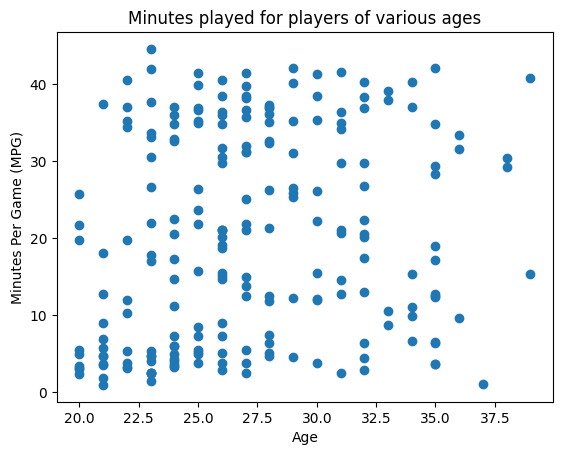

In [ ]:
df_byage=combined_df.sort_values(by='Age')
df_byage['Age']=df_byage['Age'].astype('int')
plt.scatter(df_byage['Age'],df_byage['MPG'])
plt.xlabel('Age')
plt.ylabel('Minutes Per Game (MPG)')
plt.title('Minutes played for players of various ages')
plt.show()

In [ ]:
correlation_coefficient = np.corrcoef(df_byage['Age'],df_byage['MPG'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.19487891846507568


There is no clear correlation.

Are there any correlation between height and average number of blocks per game?

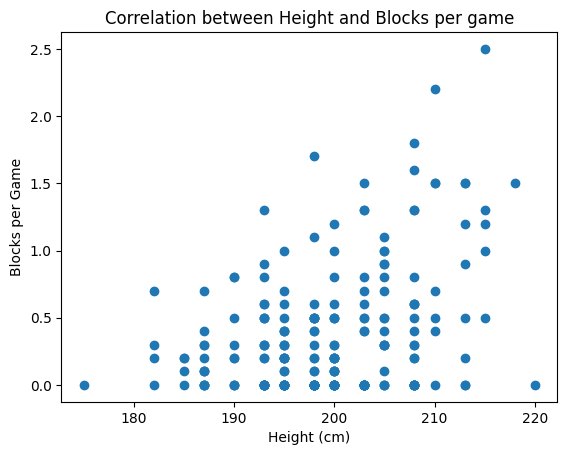

In [ ]:
def convert_to_cm(height):
    feet, inches = map(int, height.split('-'))
    total_inches = feet * 12 + inches
    cm = total_inches * 2.54
    return cm

combined_df['Height_cm']=combined_df['HT'].apply(convert_to_cm).astype('int')
df_byheight=combined_df.sort_values(by='Height_cm')
plt.scatter(df_byheight['Height_cm'],df_byheight['BPG'])
plt.xlabel('Height (cm)')
plt.ylabel('Blocks per Game')
plt.title('Correlation between Height and Blocks per game')
plt.show()

In [ ]:
correlation_coefficient = np.corrcoef(df_byheight['Height_cm'], df_byheight['BPG'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.36716268745610214


There is not a strong correlation. Let's narrow it down to the top 20 players of the league.

The top players are defined by their PPG, RPG and APG.

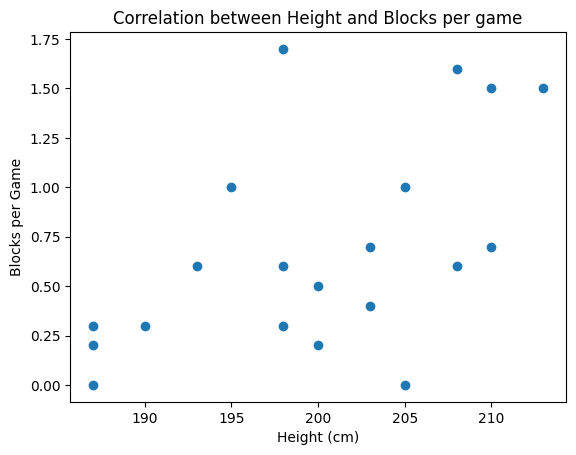

In [ ]:
def top_player(row):
   weighted_stats=row['PPG']*0.4+row['APG']*0.3+row['RPG']*0.3
   return weighted_stats

combined_df['combined_stats']=combined_df.apply(top_player,axis=1)
top20_df=combined_df.sort_values(by='combined_stats',ascending=False)[:20]
top20_sortedheight=top20_df.sort_values(by='Height_cm')
plt.scatter(top20_sortedheight['Height_cm'],top20_sortedheight['BPG'])
plt.xlabel('Height (cm)')
plt.ylabel('Blocks per Game')
plt.title('Correlation between Height and Blocks per game')
plt.show()


In [ ]:
correlation_coefficient = np.corrcoef(top20_sortedheight['Height_cm'], top20_sortedheight['BPG'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.5451766657695876


A correlation coefficient of 0.55 suggests that there is a moderate positive relationship between the variables. This suggests a meaningful association between the variables.




Which of the top 10 players in the league has the worst turnover records?


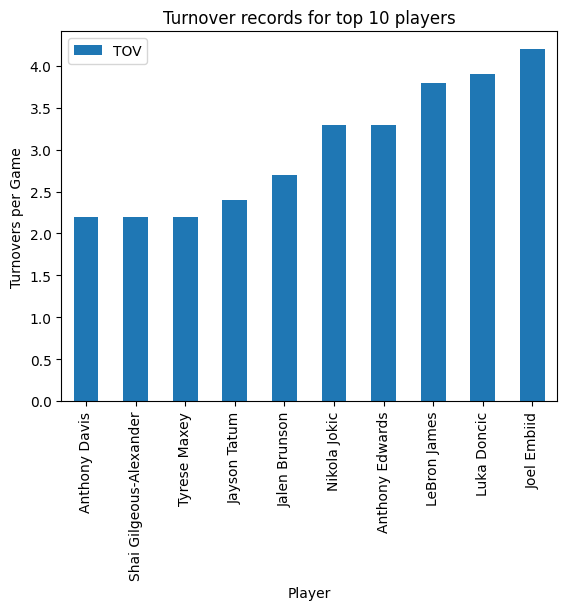

In [ ]:
top10_df=combined_df.sort_values(by='combined_stats',ascending=False)[:10]
top10_sortedTOV=top10_df.sort_values(by='TOV')
top10_sortedTOV.plot(kind='bar',x='Player',y='TOV')
plt.xlabel('Player')
plt.ylabel('Turnovers per Game')
plt.title('Turnover records for top 10 players')
plt.xticks(rotation=90,fontsize=10)
plt.show()



Which team averaged the highest point per game?

Find the total points for each player
Find the total points for each team
Divide by the number of games each team played
Plot a bar graph

Team
IND    114.082353
dtype: float64


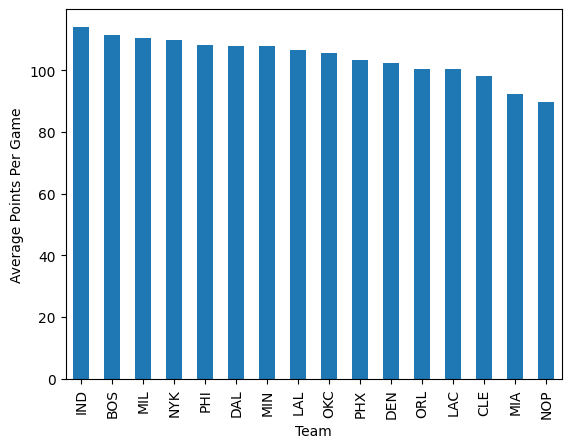

In [ ]:
combined_df['Total Points']=combined_df['PPG'].mul(combined_df['GP'])
totalpoints_team=combined_df.groupby('Team')['Total Points'].sum()
totalgames_team=combined_df.groupby('Team')['GP'].max()
avgpoint_team=totalpoints_team/totalgames_team
sorted_avgpoint_team=avgpoint_team.sort_values(ascending=False)
print(sorted_avgpoint_team[:1])
sorted_avgpoint_team.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Average Points Per Game')
plt.show()

